Name : HADIQA MAQSOOD

Task : NEXT WORD PREDICTION

Level : ADVANCE LEVEL

Batch : LGMVIP September-2021

In this task, I will train a Deep Learning model for next word prediction using Python. 
And for that purpose will use the Tensorflow and Keras library in Python.

In [2]:
# Import libraries

import numpy as np
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize

from keras.models import Sequential, load_model
from keras.layers import LSTM
from keras.layers.core import Dense, Activation

#from keras.optimizers import RMSprop
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import pickle
import heapq

In [47]:
# Load the data

path = 'H:\\Lets Grow More Internship\\Next Word Prediction TASK_4\\1661-0.txt'
text = open(path, encoding='utf-8').read().lower()
print('Dataset length:', len(text))

Dataset length: 581888


Splitting the dataset into each word in order

In [4]:
# Except presence of some special characters

tokenizer = RegexpTokenizer("[\w']+")
words = tokenizer.tokenize(text)

words

['project',
 "gutenberg's",
 'the',
 'adventures',
 'of',
 'sherlock',
 'holmes',
 'by',
 'arthur',
 'conan',
 'doyle',
 'this',
 'ebook',
 'is',
 'for',
 'the',
 'use',
 'of',
 'anyone',
 'anywhere',
 'at',
 'no',
 'cost',
 'and',
 'with',
 'almost',
 'no',
 'restrictions',
 'whatsoever',
 'you',
 'may',
 'copy',
 'it',
 'give',
 'it',
 'away',
 'or',
 're',
 'use',
 'it',
 'under',
 'the',
 'terms',
 'of',
 'the',
 'project',
 'gutenberg',
 'license',
 'included',
 'with',
 'this',
 'ebook',
 'or',
 'online',
 'at',
 'www',
 'gutenberg',
 'net',
 'title',
 'the',
 'adventures',
 'of',
 'sherlock',
 'holmes',
 'author',
 'arthur',
 'conan',
 'doyle',
 'release',
 'date',
 'november',
 '29',
 '2002',
 'ebook',
 '1661',
 'last',
 'updated',
 'may',
 '20',
 '2019',
 'language',
 'english',
 'character',
 'set',
 'encoding',
 'utf',
 '8',
 'start',
 'of',
 'this',
 'project',
 'gutenberg',
 'ebook',
 'the',
 'adventures',
 'of',
 'sherlock',
 'holmes',
 'produced',
 'by',
 'an',
 'anonymo

Performing the feature engineering in our data

In [5]:
# Create a dictionary with each word in the data within the list of unique words as the key

unique_words = np.unique(words)
unique_word_index = dict((c, i) for i, c in enumerate(unique_words))

unique_word_index

{"'as": 0,
 '0': 1,
 '000': 2,
 '1': 3,
 '10': 4,
 '100': 5,
 '1000': 6,
 '10_s_': 7,
 '10th': 8,
 '11': 9,
 '117': 10,
 '120': 11,
 '12_s_': 12,
 '12th': 13,
 '14': 14,
 '140': 15,
 '15': 16,
 '150': 17,
 '1500': 18,
 '1661': 19,
 '16a': 20,
 '17': 21,
 '1846': 22,
 '1858': 23,
 '1869': 24,
 '1870': 25,
 '1878': 26,
 '1883': 27,
 '1884': 28,
 '1887': 29,
 '1888': 30,
 '1890': 31,
 '19th': 32,
 '1_s_': 33,
 '2': 34,
 '20': 35,
 '200': 36,
 '2001': 37,
 '2002': 38,
 '2019': 39,
 '220': 40,
 '221b': 41,
 '226': 42,
 '22nd': 43,
 '249': 44,
 '25': 45,
 '250': 46,
 '26': 47,
 '26_s_': 48,
 '27': 49,
 '270': 50,
 '29': 51,
 '2_s_': 52,
 '2nd': 53,
 '3': 54,
 '30': 55,
 '31': 56,
 '35': 57,
 '3rd': 58,
 '4': 59,
 '40': 60,
 '4000': 61,
 '421': 62,
 '4700': 63,
 '4_d_': 64,
 '4th': 65,
 '4½': 66,
 '5': 67,
 '50': 68,
 '501': 69,
 '596': 70,
 '6': 71,
 '60': 72,
 '6221541': 73,
 '64': 74,
 '6_d_': 75,
 '7': 76,
 '700': 77,
 '750': 78,
 '750175': 79,
 '77': 80,
 '7_s_': 81,
 '7th': 82,
 '8': 83

In [6]:
# Define a Word length which will represent the number of previous words that will determine our next word
WORD_LENGTH = 5

# Define prev words to keep five previous words
prev_words = []

# Corresponding next words in the list of next words
next_words = []

for i in range(len(words) - WORD_LENGTH):
    prev_words.append(words[i:i + WORD_LENGTH])
    next_words.append(words[i + WORD_LENGTH])
    
print(prev_words[0])
print(next_words[0])

['project', "gutenberg's", 'the', 'adventures', 'of']
sherlock


In [7]:
# Create two numpy arrays x for storing the features and y for storing its corresponding label

X = np.zeros((len(prev_words), WORD_LENGTH, len(unique_words)), dtype=bool)
Y = np.zeros((len(next_words), len(unique_words)), dtype=bool)

In [8]:
for i, each_words in enumerate(prev_words):
    for j, each_word in enumerate(each_words):
        X[i, j, unique_word_index[each_word]] = 1
    Y[i, unique_word_index[next_words[i]]] = 1

In [9]:
# Single sequence

print(X[0][0])

[False False False ... False False False]


Building the Recurrent Neural network

In [10]:
# Use the LSTM model for next word prediction model

model = Sequential()
model.add(LSTM(128, input_shape=(WORD_LENGTH, len(unique_words))))
model.add(Dense(len(unique_words)))
model.add(Activation('softmax'))

Training the Next Word Prediction Model

In [11]:
# training the next word prediction model with 20 epochs

optimizer = RMSprop(lr=0.01)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history = model.fit(X, Y, validation_split=0.05, batch_size=128, epochs=2, shuffle=True).history

C:\Users\hadiq\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/2
811/811 [==============================] - 369s 450ms/step - loss: 6.0139 - accuracy: 0.1062 - val_loss: 7.1070 - val_accuracy: 0.1033
Epoch 2/2
811/811 [==============================] - 343s 423ms/step - loss: 5.7791 - accuracy: 0.1480 - val_loss: 7.8728 - val_accuracy: 0.1082


Now we have successfully trained our model, before moving forward to evaluating our model, 
it will be better to save this model for our future use.

In [12]:
model.save('keras_next_word_model.h5')
pickle.dump(history, open("history.p", "wb"))
model = load_model('keras_next_word_model.h5')
history = pickle.load(open("history.p", "rb"))

Evaluating the Next Word Prediction Model

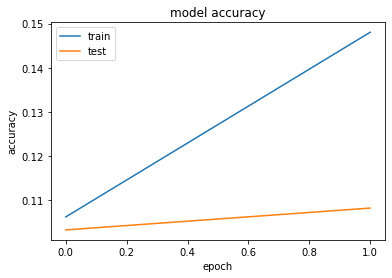

In [13]:
# Check how our model is behaving based on its accuracy 

plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

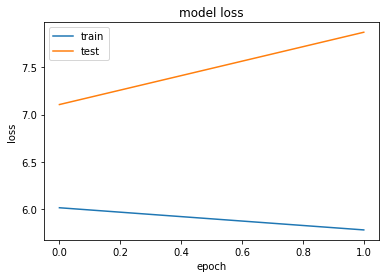

In [14]:
# Check how our model is behaving based on its loss changes while training

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

Testing Next Word Prediction Model

In [15]:
# Create a function for incoming inputs

def prepare_input(text):
    x = np.zeros((1, WORD_LENGTH, len(unique_words)))
    for t, word in enumerate(text.split()):
        print(word)
        x[0, t, unique_word_index[word]] = 1
    return x

prepare_input("It is not a lack".lower())

it
is
not
a
lack


array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [32]:
# To choose the best possible "n" words

def sample(preds, top_n=3):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    
    return heapq.nlargest(top_n, range(len(preds)), preds.take)

In [41]:
# Create a function for next word prediction

def predict_completions(text, n=3):
    if text == "":
        return("0")
    x = prepare_input(text)
    preds = model.predict(x, verbose=0)[0]
    next_indices = sample(preds, n)
    return [unique_words[idx] for idx in next_indices]

In [42]:
# using the following quotes sequence as a base for our predictions

quotes = [
    "Attitude is a little thing that makes a big difference.",
    "That which does not kill us makes us stronger.",
    "Light the candle instead of cursuing darkness.",
    "Are you lost baby girl?",
    "It is hard enough to remember my opinions, without also remembering my reasons for them!"
]

Using the model to predict the next word

In [46]:
for q in quotes:
    seq = " ".join(tokenizer.tokenize(q.lower())[0:5])
    print("Sequence: ", seq)
    print("\nnext possible words: ", predict_completions(seq, 5))

Sequence:  attitude is a little thing
attitude
is
a
little
thing

next possible words:  ['and', 'said', 'to', 'in', 'for']
Sequence:  that which does not kill
that
which
does
not
kill

next possible words:  ['the', 'to', 'it', 'and', 'in']
Sequence:  light the candle instead of
light
the
candle
instead
of

next possible words:  ['the', 'a', 'his', 'my', 'it']
Sequence:  are you lost baby girl
are
you
lost
baby
girl

next possible words:  ['and', 'you', 'in', 'for', 'to']
Sequence:  it is hard enough to
it
is
hard
enough
to

next possible words:  ['go', 'be', 'think', 'you', 'know']
